# STS(Semantic Text Similarity) Dataset


## 원본 데이터셋 (📁raw_data)
| Dataset            | train                    | dev | test |
| ------------------ | ----------------------- | --------------: | -----------: |
| **문장 수**        | 9324      |           550 |       1100 |
| **비율**        | 85      |           5 |       10 |

<br/>

### Columns
* **id** (문자열) : 문장 고유 ID : `데이터이름-버전-train/dev/test-번호`

* **source** (문자열) : 문장의 출처

    * **petition** (국민청원 게시판 제목 데이터)

    * **NSMC** (네이버 영화 감성 분석 코퍼스, Naver Sentiment Movie Corpus)

    * **slack** (업스테이지(Upstage) 슬랙 데이터)

* **sentence1** (문자열) : 문장 쌍의 첫번째 문장

* **sentence2** (문자열) : 문장 쌍의 두번째 문장

* **label** : 문장 쌍에 대한 유사도 0~5 점 사이의 실수 ; 소수 첫째 자리까지 존재
    * 5점 : 두 문장의 핵심 내용이 동일하며, 부가적인 내용들도 동일함

    * 4점 : 두 문장의 핵심 내용이 동등하며, 부가적인 내용에서는 미미한 차이가 있음

    * 3점 : 두 문장의 핵심 내용은 대략적으로 동등하지만, 부가적인 내용에 무시하기 어려운 차이가 있음

    * 2점 : 두 문장의 핵심 내용은 동등하지 않지만, 몇 가지 부가적인 내용을 공유함

    * 1점 : 두 문장의 핵심 내용은 동등하지 않지만, 비슷한 주제를 다루고 있음

    * 0점 : 두 문장의 핵심 내용이 동등하지 않고, 부가적인 내용에서도 공통점이 없음

* **binary-label** : 문장 쌍에 대한 유사도가 2점 이하 → 0, 3점 이상 → 1로 변환한 binary label



In [1]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("dev.csv")
test = pd.read_csv("test.csv")

In [6]:
len(train), len(val), len(test)

(9324, 550, 1100)

In [9]:
train.head(2)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0


In [10]:
val.head(2)

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-dev-000,nsmc-sampled,액션은개뿔 총몇번쏘고 끝입니다,액션은 흉내만 내고 그마저도 후반부에는 슬로우모션 처리,2.0,0.0
1,boostcamp-sts-v1-dev-001,slack-rtt,감격스러워 입막으심?,너무 감동해서 입 다물어?,3.4,1.0


In [11]:
test.head(2)

,id,source,sentence_1,sentence_2
0,boostcamp-sts-v1-test-000,petition-sampled,가상화폐거래소 폐쇄하지 말고,가상화폐 거래소 폐쇄 반대합니다
1,boostcamp-sts-v1-test-001,petition-sampled,뇌물적폐1호 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하라,뇌물적폐 원조 640만달라 70억 뇌물받은 권양숙 구속하고 재산을 몰수하세요


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB


In [14]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage: 25.9+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1100 non-null   object
 1   source      1100 non-null   object
 2   sentence_1  1100 non-null   object
 3   sentence_2  1100 non-null   object
dtypes: object(4)
memory usage: 34.5+ KB


### label 분포 비율

* 유사도 점수 분포에 따른 데이터 개수는 유사한지 (Class imbalance?) <br/>
→점수 분포 imbalance 문제가 있다. <br/>
<br/>
⇒ 데이터 Augmentation <br/>
⇒ Focal Loss? <br/>

In [3]:
def get_preprocessed_label(df):
    for i in range(len(df)):
        df.loc[i,"preprocessed_label"] = round(df.loc[i, "label"])
    
    return df

In [4]:
train = get_preprocessed_label(train)
val = get_preprocessed_label(val)

In [39]:
train_count = train['preprocessed_label'].value_counts()
val_count = val['preprocessed_label'].value_counts()

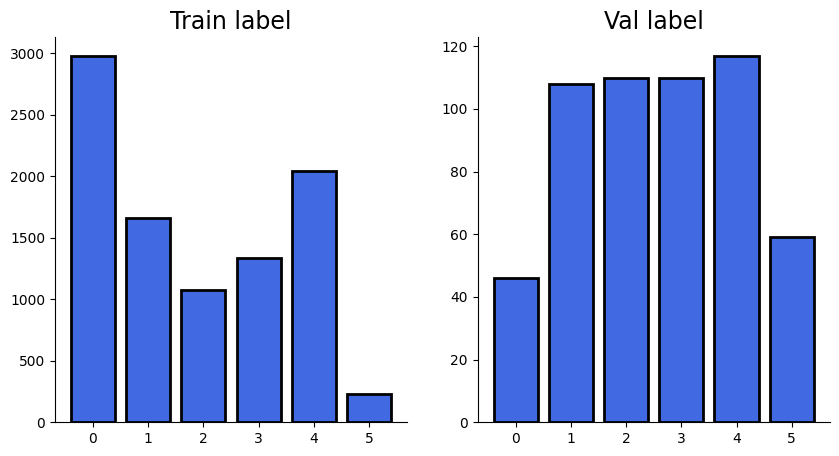

In [81]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

axes[0].bar(train_count.index, train_count, edgecolor='black', linewidth=2, color='royalblue')    
axes[0].set_title("Train label", fontsize=17)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].bar(val_count.index, val_count, edgecolor='black', linewidth=2, color='royalblue')
axes[1].set_title("Val label", fontsize=17)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.show()

In [54]:
total_train_count = sum(train_count.tolist())

for k, v in train_count.items():
    print("label:",k, "→", v,"개", round(v/total_train_count,2), "%")

label: 0.0 → 2981 개 0.32 %
label: 4.0 → 2045 개 0.22 %
label: 1.0 → 1658 개 0.18 %
label: 3.0 → 1334 개 0.14 %
label: 2.0 → 1075 개 0.12 %
label: 5.0 → 231 개 0.02 %


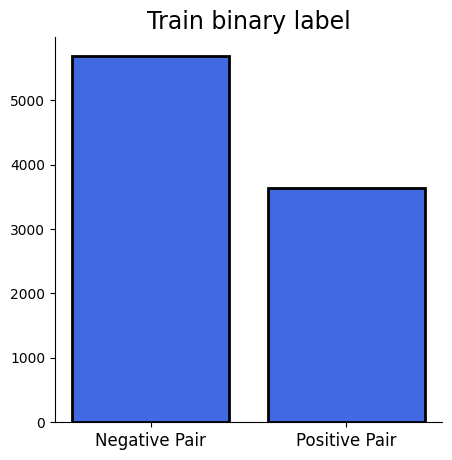

In [36]:
train_bin_count = train['binary-label'].value_counts()

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.bar([0,1], train_bin_count, edgecolor='black', linewidth=2, color='royalblue')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Negative Pair', 'Positive Pair'], fontsize=12)
ax.set_title("Train binary label", fontsize=17)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [66]:
total_train_bin_count = sum(train_bin_count.tolist())

for k, v in train_bin_count.items():
    print("label:",k, "→", v,"개", round(v/total_train_bin_count,2), "%")

label: 0.0 → 5692 개 0.61 %
label: 1.0 → 3632 개 0.39 %


## 각 점수마다의 문장쌍 살펴보기

* 오류, 잘못된 라벨링 등 필터링 -> 노가다 하지만 노이즈 제거를 위해 중요
* positive pair 는 충분한지
* 데이터 셋에서 어떤게 유사한거고, 어떤게 유사하지 않은건지 파악

In [6]:
pd.options.display.max_rows = 3000

## Positive pair

### 5점 : 두 문장의 핵심 내용이 동일하며, 부가적인 내용들도 동일함

In [9]:
train[train['label']==5]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
342,boostcamp-sts-v1-train-342,petition-rtt,정형식판사 감사요청,정형식 판사 감사요청,5.0,1.0,5.0
358,boostcamp-sts-v1-train-358,petition-sampled,이병박 출국금지 청원 합니다.,이명박 출국 금지 청원합니다.,5.0,1.0,5.0
448,boostcamp-sts-v1-train-448,petition-rtt,제주도 가정용lpg통가스보일러,제주도 가정용 LPG 통가스보일러,5.0,1.0,5.0
621,boostcamp-sts-v1-train-621,petition-sampled,청소년법 폐지 시켜주세요,청소년법 폐지 시켜 주세요,5.0,1.0,5.0
624,boostcamp-sts-v1-train-624,nsmc-rtt,"잔잔한 감동으로 다가온영화,","잔잔한 감동으로 다가온 영화,",5.0,1.0,5.0
760,boostcamp-sts-v1-train-760,nsmc-rtt,그냥재미없음;;;;,그냥 재미 없음;,5.0,1.0,5.0
846,boostcamp-sts-v1-train-846,petition-rtt,미친 부동산(서울 아파트),미친 부동산 (서울 아파트),5.0,1.0,5.0
996,boostcamp-sts-v1-train-996,petition-rtt,이명박 출국금지 구속수사!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,이명박 출국금지 구속 수사!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,5.0,1.0,5.0
1015,boostcamp-sts-v1-train-1015,petition-rtt,카쉐어링 업체의 무료편도를 제한해주세요,카셰어링 업체의 무료 편도를 제한해주세요,5.0,1.0,5.0
1054,boostcamp-sts-v1-train-1054,petition-rtt,이수역 폭행 피해자 코스프레 제대로수사,이수역 폭행 피해자 코스프레 제대로 수사,5.0,1.0,5.0


* 5점 [ 두 문장의 핵심 내용이 동일하며, 부가적인 내용들도 동일함]
    * 띄어쓰기만 다를경우
        * 스토리는엉성하지만 조문탁의 액션이 볼만하다 ↔ 스토리는 엉성하지만 조문탁의 액션은 볼 만하다.
    * 특수기호만 다를경우
        * 다음에 또 뵈어요!!	↔ 다음에 또 뵈어요~!!
    * 을/를/에게 같은 조사
        * 청원게시판 없에주세요. ↔ 청원게시판을 없애주세요
    * 의미가 같지만 다르게 표현하는 단어
        * 애기가 너무 이뻐요 ↔ 아기 너무 이뻐요
        * 한국의 미래는 지옥이다 ↔ 대한민국의 미래는 지옥이다
        * 안녕하십니까. 대한민국에 살고있는 청년입니다.	안녕하세요. 저는 한국에 살고 있는 청년입니다
    * 단어 순서만 다른 경우
        * 전이명박대통령 출국금지	이명박 전 대통령 출국금지	

### 4점 : 두 문장의 핵심 내용이 동등하며, 부가적인 내용에서는 미미한 차이가 있음

In [10]:
train[train['label']==4.8]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
259,boostcamp-sts-v1-train-259,petition-rtt,오토바이(이륜차) 보행자 횡단보도 사용금지 입법 조치,횡단보도에서 오토바이(이륜차) 사용을 금지하는 입법 조치,4.8,1.0,5.0
499,boostcamp-sts-v1-train-499,petition-sampled,이명박 출국금지신청,이명박 출국금지 신청,4.8,1.0,5.0
517,boostcamp-sts-v1-train-517,slack-rtt,"어제 플랫폼팀 미니 워크샵을 마치고, <PERSON> 님과 함께 맛있는 조개전골을 ...",어제 플랫폼팀 미니 워크샵을 마치고 <PERSON>과 함께 맛있는 조개전골을 먹었습니다.,4.8,1.0,5.0
649,boostcamp-sts-v1-train-649,petition-sampled,조두순출소반대합니다,조두순출소반대합니다!!,4.8,1.0,5.0
844,boostcamp-sts-v1-train-844,petition-sampled,동물보호법강화해주세요,동물보호법좀 강화해주세요,4.8,1.0,5.0
1179,boostcamp-sts-v1-train-1179,petition-rtt,근로시간 단축후 정부의 강한 규제 필요,근로시간 단축 후 강력한 정부 규제 필요,4.8,1.0,5.0
1262,boostcamp-sts-v1-train-1262,petition-rtt,외국인 노동자 감축,외국인근로자 감축,4.8,1.0,5.0
1288,boostcamp-sts-v1-train-1288,petition-rtt,태양광 발전에 대하여,태양광 발전에 대해,4.8,1.0,5.0
1290,boostcamp-sts-v1-train-1290,slack-sampled,얘기 너무 즐거웠어요 ㅎㅎ,이야기 너무 즐거웠어요!!,4.8,1.0,5.0
1681,boostcamp-sts-v1-train-1681,slack-rtt,(아침부터 고생하셨어요….ㅎㅎ),(아침부터 수고하셨습니다..하하),4.8,1.0,5.0


* 4.8점
    * 띄어쓰기만 다른데 4.8점
        * 이명박 출국금지신청	이명박 출국금지 신청	
        * 왜 이런식으로 만들었을까?	왜 이런 식으로 만들었을까?
    * 조사
        * 조두순 무기징역으로	조두순을 무기징역으로
    * 특수기호 차이인데
        * 소년법폐지해주세요!!	소년법폐지해주세요!!!

In [11]:
train[train['label']==4.6]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
148,boostcamp-sts-v1-train-148,slack-rtt,어린이날에 산 선인장이 왔어요,어린이날 구입한 선인장이 왔어요,4.6,1.0,5.0
224,boostcamp-sts-v1-train-224,petition-rtt,꽃에 물을 줘야합니다~,꽃에 물을 주어야 합니다!,4.6,1.0,5.0
284,boostcamp-sts-v1-train-284,slack-sampled,정말 즐거웠어요~~~~~~,정말 즐거웠습니다~~~,4.6,1.0,5.0
351,boostcamp-sts-v1-train-351,petition-sampled,김보람 박지우 국대 박탈,김보름.박지우 국가대표 박탈,4.6,1.0,5.0
551,boostcamp-sts-v1-train-551,petition-rtt,우리 보육교사들이 아이들을 잘 보살피고 교육 할수 있는 법적 제도 개편을 요청 합니다!!,우리 보육교사들이 아이들을 잘 보살피고 교육할 수 있도록 법제도 개혁을 요청합니다!!,4.6,1.0,5.0
664,boostcamp-sts-v1-train-664,petition-rtt,신도시가 아니 지하철 순화선등 지하철 노선을 늘려주세요,신도시보다는 지하철 순화선 등 지하철 노선을 늘려주세요,4.6,1.0,5.0
958,boostcamp-sts-v1-train-958,petition-rtt,이제 더이상 법원을 믿지못하니 AI 도입하세요.,더 이상 법원을 신뢰하지 않으니 이제 AI를 도입하세요.,4.6,1.0,5.0
1159,boostcamp-sts-v1-train-1159,nsmc-rtt,"짧은 시간동안 미국의 보통 소년의 삶을 체험하며, 인생은 연속된 선이 아니라 매순간...",짧은 시간 미국에서 평범한 소년의 삶을 경험한 그는 인생은 연속선이 아니라 매 순간...,4.6,1.0,5.0
1174,boostcamp-sts-v1-train-1174,petition-rtt,국회의원들이 국회 출석을 의무화 시킵시다.,국회의원의 국회출석을 의무화합시다.,4.6,1.0,5.0
1332,boostcamp-sts-v1-train-1332,nsmc-sampled,별 반개주기도 아깝다,(반개 별 주기도 아깝다),4.6,1.0,5.0


* 4.6점
    * 청소년법 폐지해주십시오	청소년법 폐지하여 주십시오.
    * 오늘 즐거웠습니다ㅎㅎ	오늘 즐거웠습니다~~	

<br/>

+ 맞춤법 오류 같은 경우는? 개인적으로 정말재밋게 봤다	개인적으로 매우재밋게보았다
=> 수정해주는게 좋을까?

In [12]:
train[train['label']==4.5]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
145,boostcamp-sts-v1-train-145,petition-rtt,[제발]이명박 개별청원하지 마시고 추천수로 정렬하셔서 3만명대 나오는 청원에 참여하...,"[제발] 이명박을 개별적으로 청원하지 말고 추천인수순으로 정렬하여 청원에 30,00...",4.5,1.0,4.0
167,boostcamp-sts-v1-train-167,petition-rtt,학생들도 투표에 참여 할 수 있게 해야 합니다.,학생들도 투표에 참여할 수 있어야 합니다.,4.5,1.0,4.0
1829,boostcamp-sts-v1-train-1829,petition-sampled,로또 추첨 생방송으로!!!,로또 추첨 생방송으로 바꿔주세요,4.5,1.0,4.0
3148,boostcamp-sts-v1-train-3148,petition-rtt,"긴급차량(소방차, 응급차 등) 길 비켜주는 방법에 대해 전국민이 정확히 알 수 있도...","온 국민이 긴급 차량(소방차, 구급차 등)의 길을 정확하게 피하는 방법을 알 수 있...",4.5,1.0,4.0
3247,boostcamp-sts-v1-train-3247,petition-rtt,북한인 정대세 티비 출연 좀 막아주세요,북한 정대세 TV 출연을 막아주세요,4.5,1.0,4.0
4134,boostcamp-sts-v1-train-4134,petition-sampled,이명박 출국 금지 바랍니다,이명박 출국 금지 해 주세요,4.5,1.0,4.0
4417,boostcamp-sts-v1-train-4417,petition-rtt,경기도 평택 아령사건의 범인인 7세 소녀를 처벌해주세요.,경기도 평택에서 덤벨 사건의 주범인 7세 소녀를 처벌해주세요.,4.5,1.0,4.0
5496,boostcamp-sts-v1-train-5496,petition-rtt,이명박 출국 금지라고 쓰시는 분들은 위에 추천순 버튼을 누르고 내리다 보면 있는데 ...,이명박의 출국금지를 쓰시는 분들은 위의 추천순으로 버튼을 누르고 아래로 스크롤 하시...,4.5,1.0,4.0
6663,boostcamp-sts-v1-train-6663,petition-rtt,서울 한복판에서 국비 보조로 해커를 양산해내는 국내 보안학원 졸업생 실태 조사와 졸...,서울 한복판에서 국고로 해커를 양산하는 국내 보안기관 졸업생들의 실태를 조사하고 졸...,4.5,1.0,4.0
6720,boostcamp-sts-v1-train-6720,petition-rtt,MB출국금지 청원합니다,이명박출국금지청원합니다,4.5,1.0,4.0


### 3점 : 두 문장의 핵심 내용은 대략적으로 동등하지만, 부가적인 내용에 무시하기 어려운 차이가 있음

In [20]:
train[train['label']==3]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,3.0
16,boostcamp-sts-v1-train-016,slack-sampled,환갑이면? ㅎㅎㅎ 이런 재미난 얘기하느라 시간이 금방 가더라고요.,넘넘 즐거운 이야기를 하고나니 시간이 금방 가버렸네요.,3.0,1.0,3.0
52,boostcamp-sts-v1-train-052,slack-sampled,같이 이야기를 하다보니 시간가는 지 모르고 이야기를 했네요,야옹이얘기와 더불어 재밌는 이야기를 하다보니 시간 가는 줄 몰랐네요.,3.0,1.0,3.0
111,boostcamp-sts-v1-train-111,nsmc-sampled,내 감정이 매말라서 그런지 모르겠지만 개인적으로는 너무 지루하고 재미없던 영화다,너무 지루한 영화다,3.0,1.0,3.0
133,boostcamp-sts-v1-train-133,slack-rtt,저도 부트캠프 2기 수강생 중에 고등학교 선배가 있어서 깜짝 놀랐던 경험이 있어서 ...,부트캠프 2반 학생들 중에 고등학생이 있어서 놀랐던 경험도 나눴다.,3.0,1.0,3.0
159,boostcamp-sts-v1-train-159,nsmc-sampled,킬링타임용 딱 그정도인듯,킬링타임용에 딱이라는 평점보고 봤는데 정말 킬링타임용엔 딱이다,3.0,1.0,3.0
163,boostcamp-sts-v1-train-163,nsmc-sampled,최고 잼있고 웃긴영화..,생각없이 웃긴영화 ㅋㅋ....,3.0,1.0,3.0
200,boostcamp-sts-v1-train-200,petition-rtt,옆집에 누가 사는데 뭐하시는 분인지 진짜...,옆집에는 누가 살고 무엇을 하고 있나요?,3.0,1.0,3.0
217,boostcamp-sts-v1-train-217,petition-rtt,손해보험 생명 보험 회사 모두 폐지 하라,모든 생명보험사 폐지,3.0,1.0,3.0
242,boostcamp-sts-v1-train-242,slack-rtt,각자 식사를 하면서 느긋(?)하게 진행하였습니다.,각자 여유롭게(?) 식사를 하는 과정을 거쳤습니다.,3.0,1.0,3.0


## Negative Pair

### 0점 : 두 문장의 핵심 내용이 동등하지 않고, 부가적인 내용에서도 공통점이 없음

In [14]:
train[train['label']==0]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,0.0
14,boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,0.0,0.0,0.0
19,boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,2023 아시안컵 유치에 공동개최를 반대 합니다.,0.0,0.0,0.0
20,boostcamp-sts-v1-train-020,slack-sampled,앞머리 새로 하셨습니다. ^^,가방에 넣어 다니면서 조금씩 먹습니다. ^^,0.0,0.0,0.0
22,boostcamp-sts-v1-train-022,slack-sampled,답답할 때 보면 속이 뻥 뚫릴 것 같아요,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,0.0,0.0,0.0
23,boostcamp-sts-v1-train-023,nsmc-sampled,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,조금유치하지만 가볍게 볼수는 있는영화네요!,0.0,0.0,0.0
38,boostcamp-sts-v1-train-038,nsmc-sampled,아무리그래도 걸어간다는 설정은쫌-_-;,허나 알리슨 로먼이 벗은건 충격 -_-;;,0.0,0.0,0.0
41,boostcamp-sts-v1-train-041,petition-sampled,나이가 문제인가요?,저는 무엇인가요??,0.0,0.0,0.0
46,boostcamp-sts-v1-train-046,slack-sampled,저는 왜 솥에 들어가계시나 했어요 ㅋㅋ,저는 사과나 우유에 프로틴타서 먹어요 ㅎㅎ,0.0,0.0,0.0
47,boostcamp-sts-v1-train-047,nsmc-sampled,동생이랑같이봤는데살인데 그닥무서워하지않고 잘본것같음....,내용도 그렇고 별로 맘에들지않는다.......,0.0,0.0,0.0


### 1점 : 두 문장의 핵심 내용은 동등하지 않지만, 비슷한 주제를 다루고 있음

In [18]:
train[train['label']==1]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
48,boostcamp-sts-v1-train-048,petition-sampled,알콜중독자가 기초생활수급자?,기초생활수급자 장애인을 위하여.,1.0,0.0,1.0
60,boostcamp-sts-v1-train-060,slack-sampled,책도 앞부분을 읽어보니 우리 회사 문화와 업무 스타일에 좋은 팁들이 들어있더라구요!!,첫날 부터 우리 회사의 좋은 문화를 가득 체험하고 갑니다 ㅎㅎ,1.0,0.0,1.0
61,boostcamp-sts-v1-train-061,petition-sampled,그루밍 성범죄'법이 있어야 합니다.,"!!'그루밍 범죄', 청소년 성폭력 범죄에서 절반!!",1.0,0.0,1.0
90,boostcamp-sts-v1-train-090,slack-sampled,둘 다 낯가리면서도 수다스러움을 감출 수 없는 캐릭터라는 것을 깨닫고 ㅋㅋ,재밌는 컨셉을 써도 숨길 수 없는 퀄리티ㅠㅠㅠ,1.0,0.0,1.0
103,boostcamp-sts-v1-train-103,nsmc-rtt,걍 회사이름도 얘기하지.,회사 이름도 언급하지 마십시오.,1.0,0.0,1.0
213,boostcamp-sts-v1-train-213,slack-sampled,브로콜리와 로메인 모종을 심어두었어요.,이게 브로콜리 아니었나요!?,1.0,0.0,1.0
229,boostcamp-sts-v1-train-229,slack-sampled,"이런 저런 회사 이야기 나누다가, 장안의 화제 오징어게임이야기가 나왔는데, 이정재 ...",다음에 뵐 때는 오징어게임 오일남 성대모사를 해주시겠다고 하셔서 기대하고 있겠습니다,1.0,0.0,1.0
278,boostcamp-sts-v1-train-278,petition-sampled,교감공모제를 합시다.,무자격 교장공모제 전면확대 폐지,1.0,0.0,1.0
338,boostcamp-sts-v1-train-338,petition-sampled,개를 가축에서 제외시켜주세요.,개를 가축에서 제외하자는 청원을 반대합니다.,1.0,0.0,1.0
371,boostcamp-sts-v1-train-371,slack-sampled,우연찮게 만우절에 합류하게 되었는데 첫날부터 즐거웠습니다 ㅋㅋ,만우절을 맞이하여 가볍게 준비해봤습니다.,1.0,0.0,1.0


### 2점 : 두 문장의 핵심 내용은 동등하지 않지만, 몇 가지 부가적인 내용을 공유함

In [19]:
train[train['label']==2]

,id,source,sentence_1,sentence_2,label,binary-label,preprocessed_label
63,boostcamp-sts-v1-train-063,slack-sampled,부트캠프 프로그램 얘기부터 추천 도메인 얘기까지 순식간에 시간이 흘러가서 너무 아쉬...,각자 업무와 부트캠프 얘기부터 앞으로 진로 얘기까지 나누다보니 한시간 훌쩍 넘게 수...,2.0,0.0,2.0
112,boostcamp-sts-v1-train-112,petition-sampled,민간어린이집과 가정어린이집에 현장에 맞추어서 법을 만들어 주십시요,민간어린이집과 가정어린이집에 운영비를 지원해 주시기 바랍니다,2.0,0.0,2.0
130,boostcamp-sts-v1-train-130,slack-rtt,저희가 지향하는 바가 비슷했었는데,우리는 같은 것을 목표로하고 있었다,2.0,0.0,2.0
132,boostcamp-sts-v1-train-132,nsmc-sampled,이런류의 영화가 지루하기 쉽지 않은데 희한하게 지루하네..,.상어 나오는 영화가 이렇게 지루할 수 있다는데 박수를보낸다. .,2.0,0.0,2.0
174,boostcamp-sts-v1-train-174,nsmc-sampled,잘보고 왔습니다 감사합니다 ^^,정말 재밌습니다^^!,2.0,0.0,2.0
188,boostcamp-sts-v1-train-188,nsmc-sampled,뭐가 이렇게 허접하다냐,"뭐이리 어설픈영화가있냐,,,",2.0,0.0,2.0
189,boostcamp-sts-v1-train-189,slack-sampled,이게 보다보니 회사 생각이 많이 납니다.,보다보니 우리 회사랑 비슷한 부분이 많아서 공유합니다.,2.0,0.0,2.0
235,boostcamp-sts-v1-train-235,petition-rtt,대한민국 국민들이 궁금해 하고 있습니다.,한국 사람들은 호기심이 많습니다.,2.0,0.0,2.0
236,boostcamp-sts-v1-train-236,petition-sampled,나이가 많은 청년들이 살수있게 햐주세요,청년들이 살기좋은 나라로 만들어주십시요.,2.0,0.0,2.0
244,boostcamp-sts-v1-train-244,nsmc-sampled,줄거리가 완전 스포일러. 엔딩까지 다 나와있네..,흔한 줄거리 뻔한 반전에 어이없어 하고 있는데 영화가 끝난다. 헤헤 ^^,2.0,0.0,2.0


In [17]:
train['label'].value_counts()

0.0    2119
4.0     516
0.4     482
3.8     452
4.2     426
3.6     400
0.6     372
0.8     358
0.2     345
1.0     342
1.2     332
3.0     283
3.4     279
3.2     270
2.8     267
1.4     254
1.8     246
2.0     236
2.6     235
4.4     209
2.2     190
2.4     187
1.6     172
5.0      91
4.6      81
4.8      59
0.5      35
3.5      31
2.5      22
1.5      22
4.5      11
Name: label, dtype: int64